In [227]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model


plt.style.use(["default"])

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [232]:
m = 0.008; c = 6 # data with approximate straight line
x = np.linspace(50, 2000, 100)
y = m*x + c + np.random.randn(100)*2 +150
z = m*x + c + np.random.randn(100)*1 + 10

dat = pd.DataFrame({'sealevel':x, 'height':y, 'leafs':z})

X = pd.DataFrame({'sealevel':x, 'height':y}).values.reshape(-1,2)

x_pred = np.linspace(0, 2000, 30)   # range of porosity values
y_pred = np.linspace(155, 172.5, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

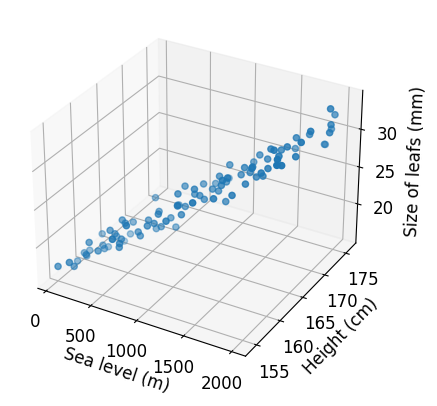

In [233]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('Sea level (m)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Size of leafs (mm)')

plt.show()

In [230]:
ols = linear_model.LinearRegression()
model = ols.fit(X, z)

predicted = model.predict(model_viz)

r2 = model.score(X, z)

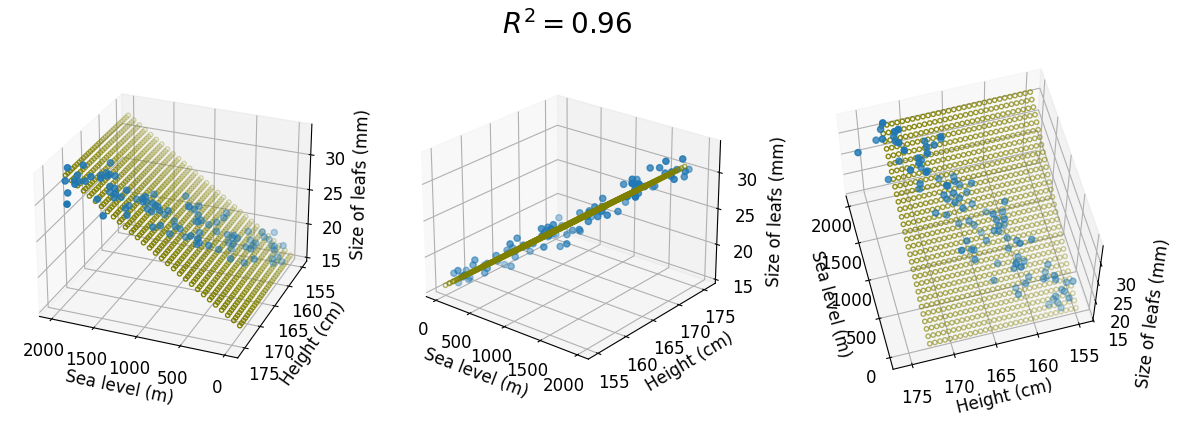

In [231]:

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(x, y, z)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=10, edgecolor='olive')
    ax.set_xlabel('Sea level (m)', fontsize=12)
    ax.set_ylabel('Height (cm)', fontsize=12)
    ax.set_zlabel('Size of leafs (mm)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=24, azim=-51)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()